### Basic K Means Clustering 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.cluster import KMeans
sb.set() # set the default Seaborn style for graphics
pd.options.mode.chained_assignment = None 

In [2]:
dataset = pd.read_csv("miami_housing.csv") #import data 
dataset_copy = pd.read_csv("miami_housing.csv")

In [3]:
X = dataset[['LATITUDE', 'LONGITUDE', 'PARCELNO']]

In [4]:
print(X.dtypes)

LATITUDE     float64
LONGITUDE    float64
PARCELNO       int64
dtype: object


In [5]:
k_means = KMeans(n_clusters=10, init='random')
X['clusters'] = k_means.fit_predict(X[['LATITUDE', 'LONGITUDE']])


In [6]:
X = X[['PARCELNO', 'clusters']]
dataset = dataset.merge(X, left_on="PARCELNO", right_on="PARCELNO")

<AxesSubplot:xlabel='LONGITUDE', ylabel='LATITUDE'>

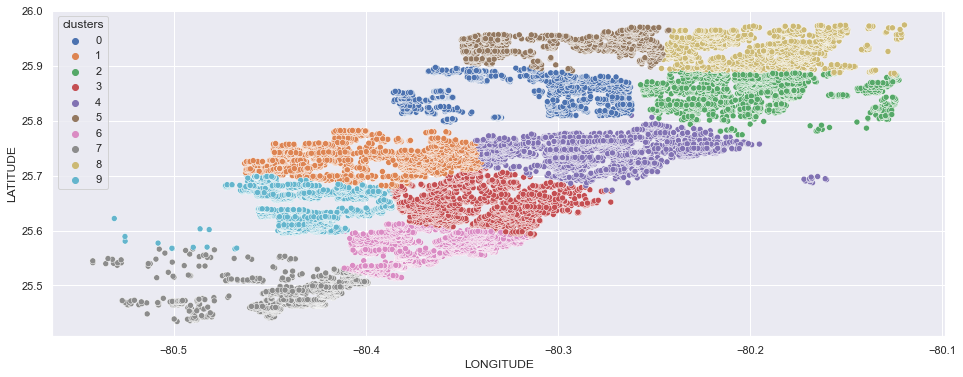

In [7]:
plt.figure(figsize=(16, 6))
sb.scatterplot(data=dataset, x="LONGITUDE", y="LATITUDE", hue="clusters", palette="deep")

Text(0.5, 1.0, 'Price based on the cluster')

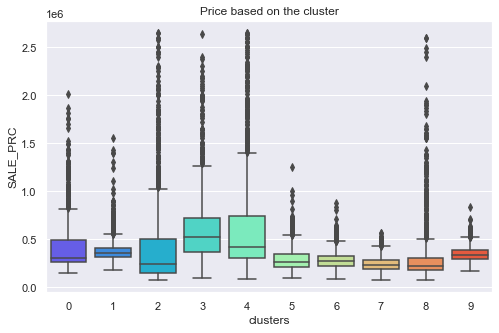

In [8]:
plt.figure(figsize=(8,5))
sb.boxplot(x='clusters',y='SALE_PRC',data=dataset, palette='rainbow')
plt.title("Price based on the cluster")

### Elbow Curve 

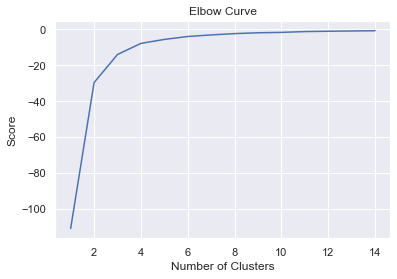

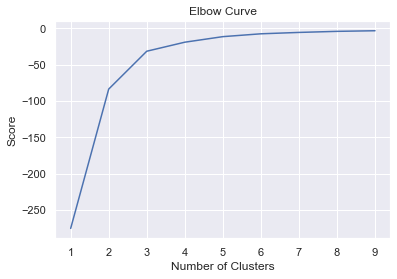

In [9]:
dataset = pd.read_csv("miami_housing.csv") #import data to reset

no_clusters = range(1,15)
k_means = [KMeans(n_clusters=i,init='random', random_state=0) for i in no_clusters]

Y_axis = dataset[['LATITUDE']]
X_axis = dataset[['LONGITUDE']]


score = [k_means[i].fit(X_axis).score(X_axis) for i in range(len(k_means))]

# Visualize
plt.plot(no_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

no_clusters = range(1,10)
k_means = [KMeans(n_clusters=i,init='random') for i in no_clusters]

Y_axis = dataset[['LATITUDE']]
X_axis = dataset[['LONGITUDE']]


score = [k_means[i].fit(Y_axis).score(Y_axis) for i in range(len(k_means))]

# Visualize
plt.plot(no_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Text(0.5, 1.0, 'Price based on the cluster')

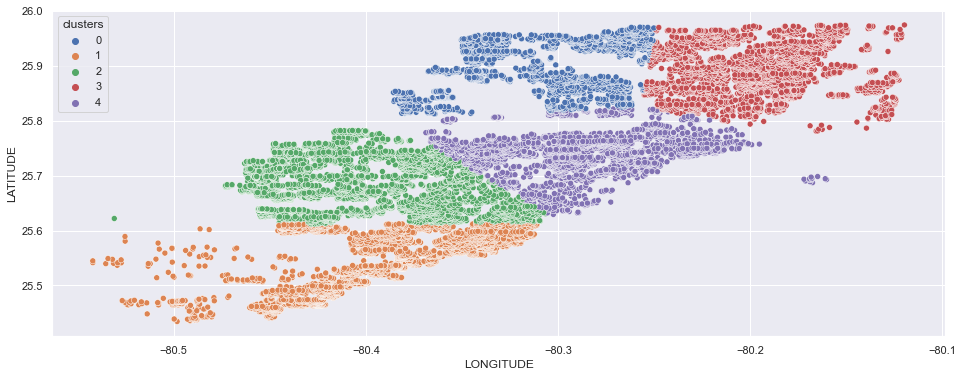

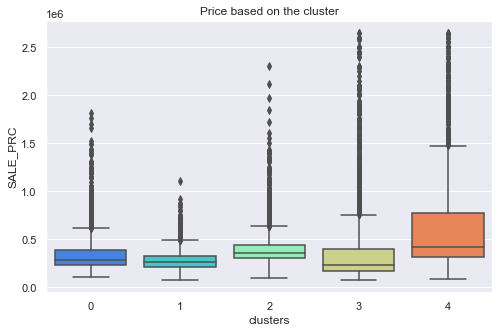

In [10]:
X = dataset[['LATITUDE', 'LONGITUDE', 'PARCELNO']]
k_means = KMeans(n_clusters=5, init='random')
X['clusters'] = k_means.fit_predict(X[['LATITUDE', 'LONGITUDE']])
X = X[['PARCELNO', 'clusters']]
dataset = dataset.merge(X, left_on="PARCELNO", right_on="PARCELNO")
plt.figure(figsize=(16, 6))
sb.scatterplot(data=dataset, x="LONGITUDE", y="LATITUDE", hue="clusters", palette="deep")
plt.figure(figsize=(8,5))
sb.boxplot(x='clusters',y='SALE_PRC',data=dataset, palette='rainbow')
plt.title("Price based on the cluster")

In [11]:
def three_Feature_clustering(varname):
    dataset = pd.read_csv("miami_housing.csv") #import data 
    X = dataset[['LATITUDE', 'LONGITUDE', 'PARCELNO', varname]]
    k_means = KMeans(n_clusters=5, init='random')
    X['clusters'] = k_means.fit_predict(X[['LATITUDE', 'LONGITUDE', varname]])
    X = X[['PARCELNO', 'clusters']]
    dataset = dataset.merge(X, left_on="PARCELNO", right_on="PARCELNO")
    plt.figure(figsize=(16, 6))
    sb.scatterplot(data=dataset, x="LONGITUDE", y="LATITUDE", hue="clusters", palette="deep")
    plt.figure(figsize=(8,5))
    sb.boxplot(x='clusters',y='SALE_PRC',data=dataset, palette='rainbow')
    string = "Price based on cluster with variable " +str(varname)
    plt.title(string)

<ipython-input-11-e5ac1e9730ef>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(16, 6))


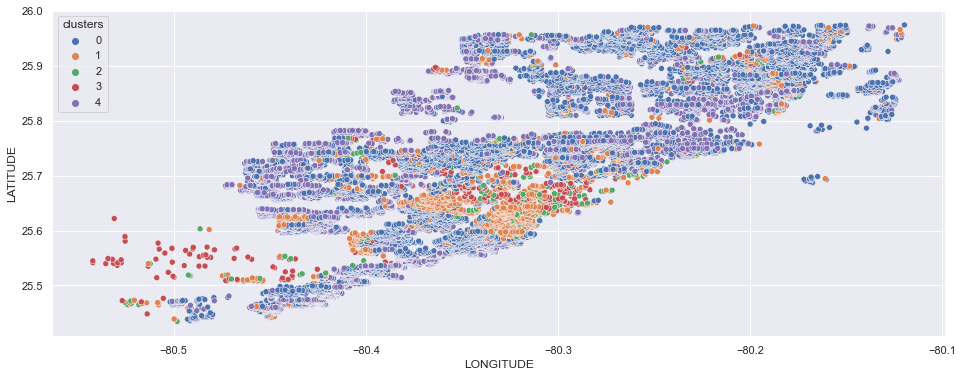

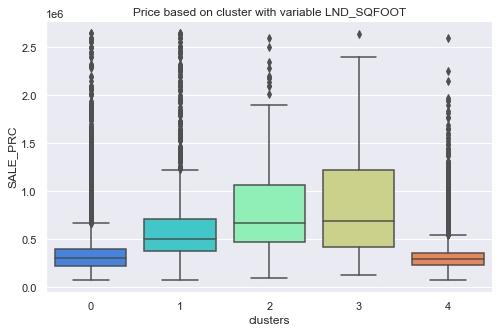

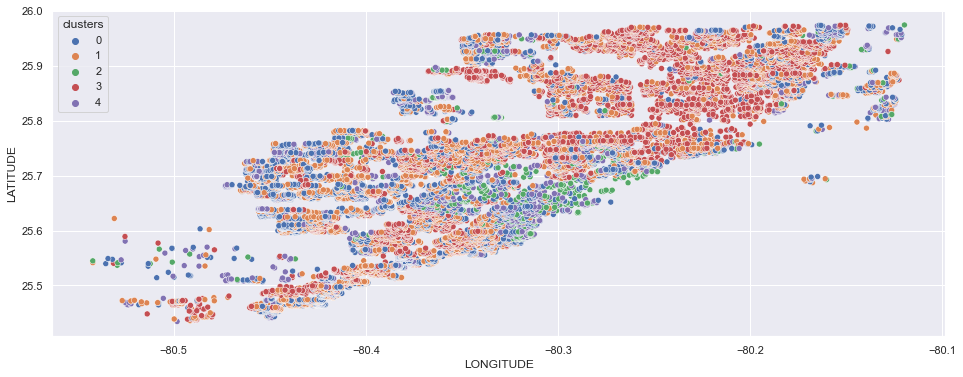

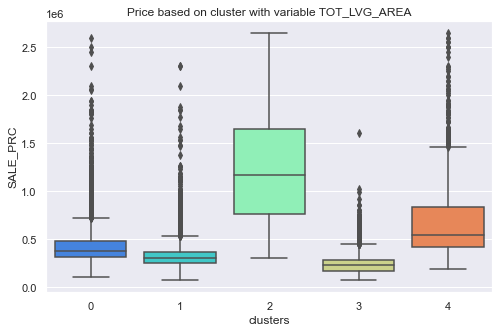

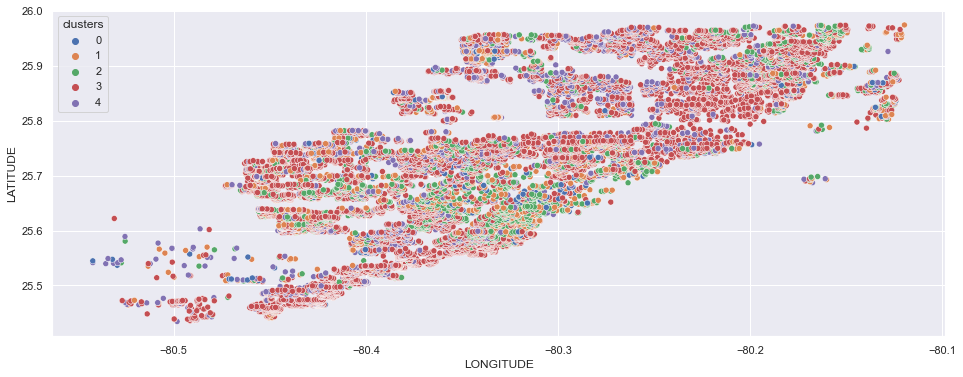

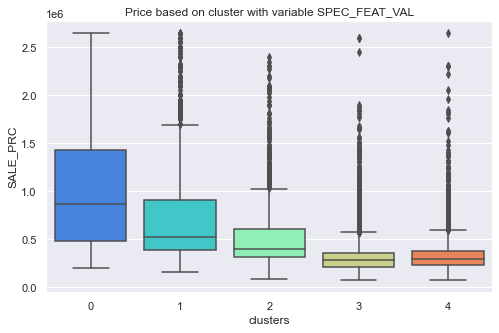

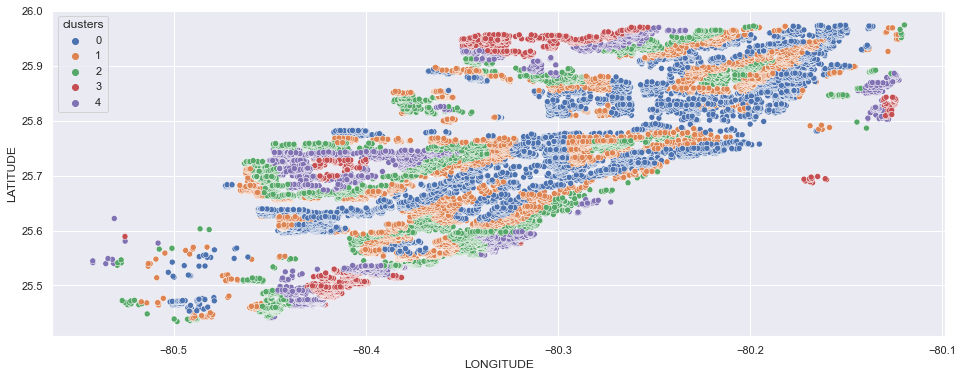

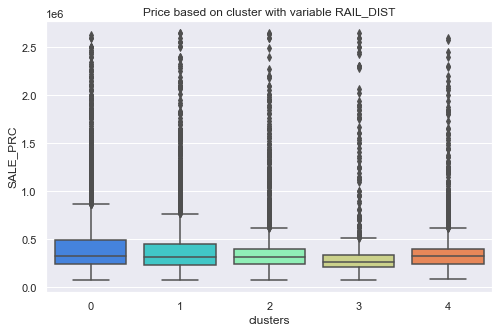

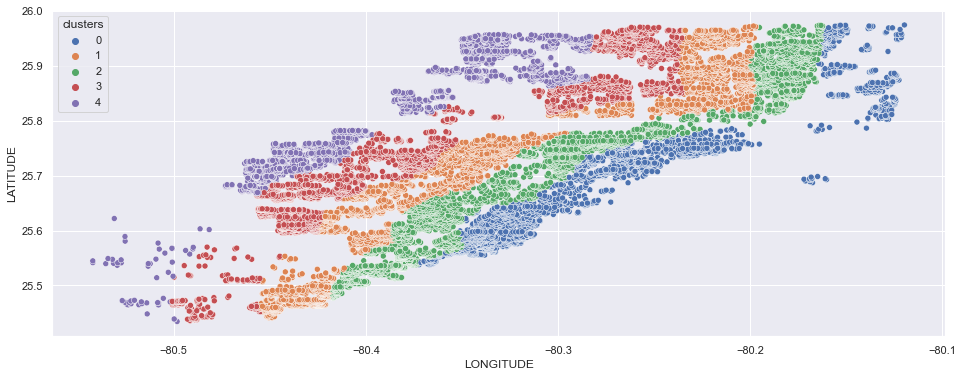

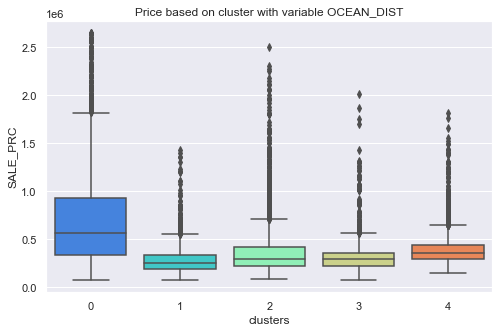

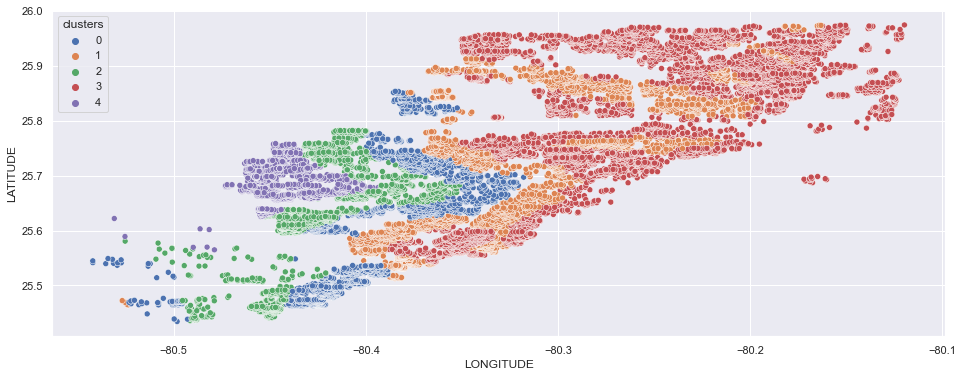

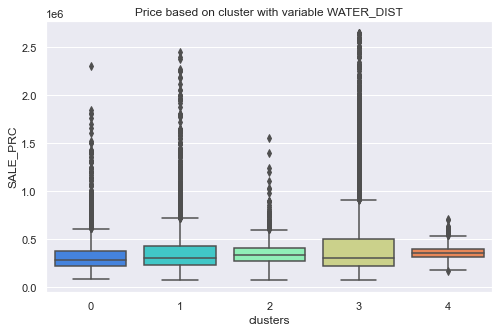

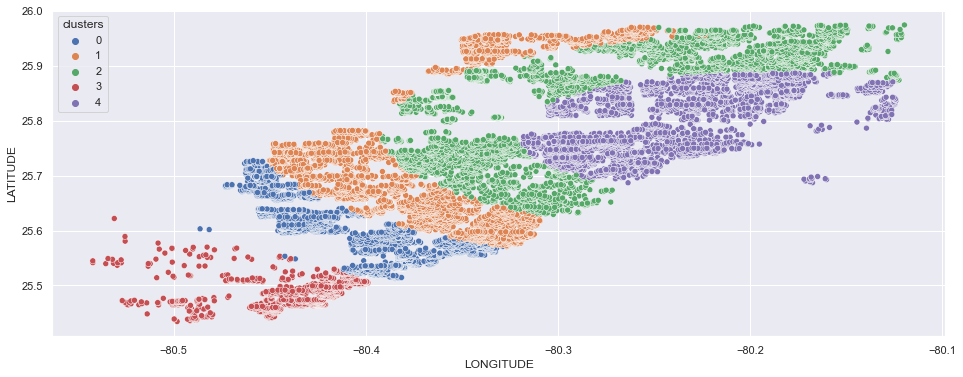

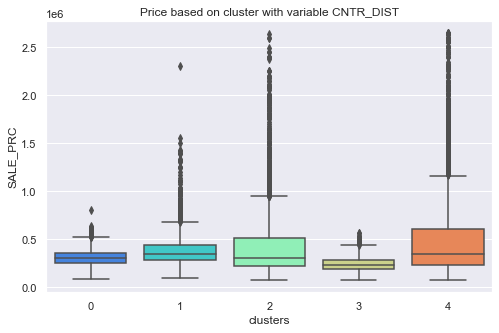

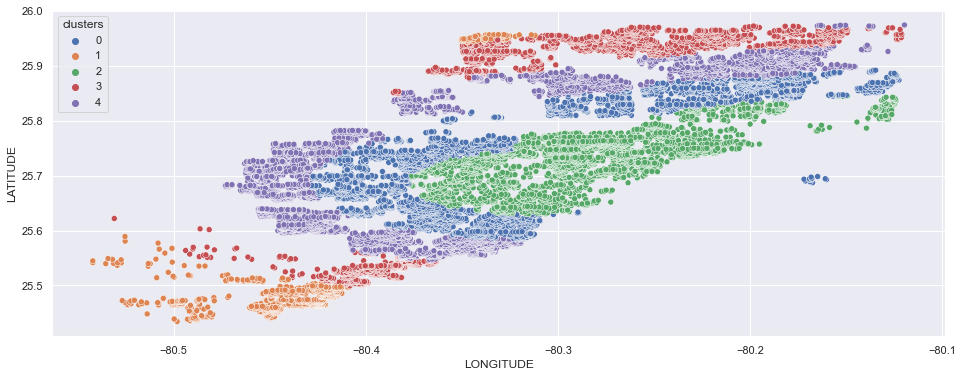

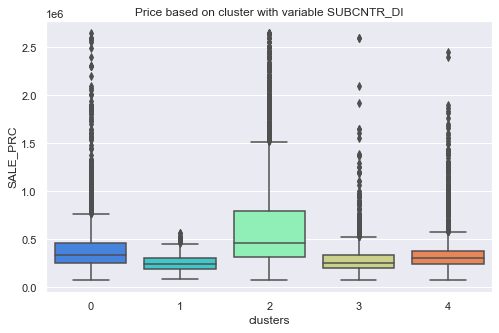

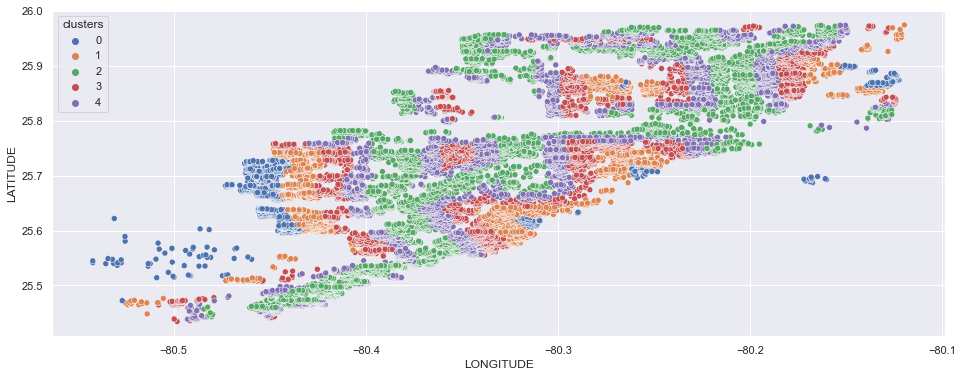

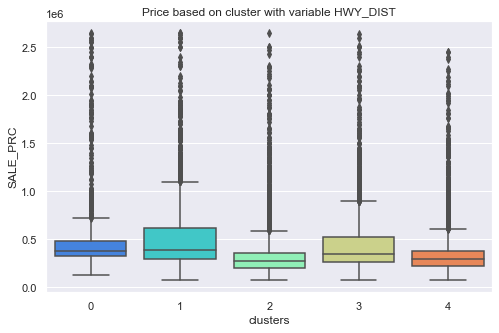

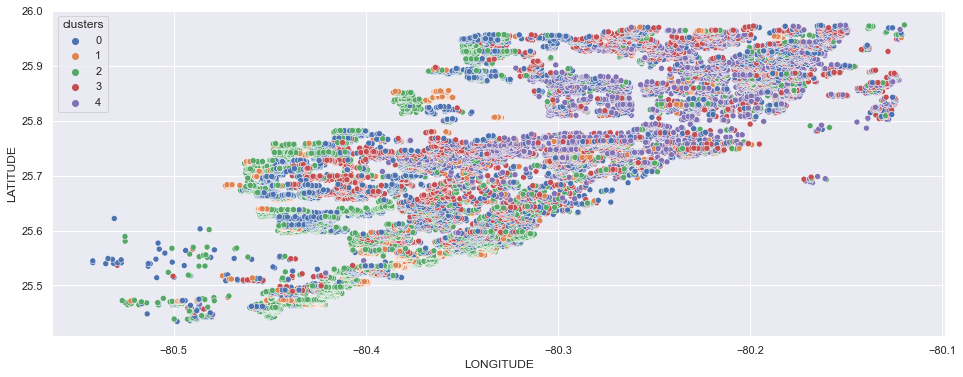

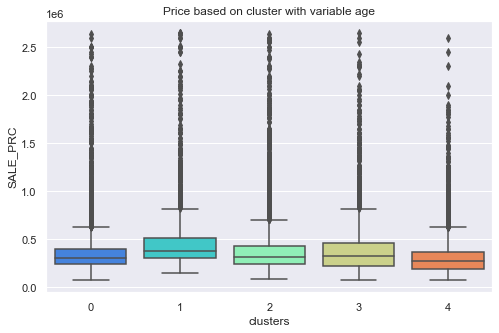

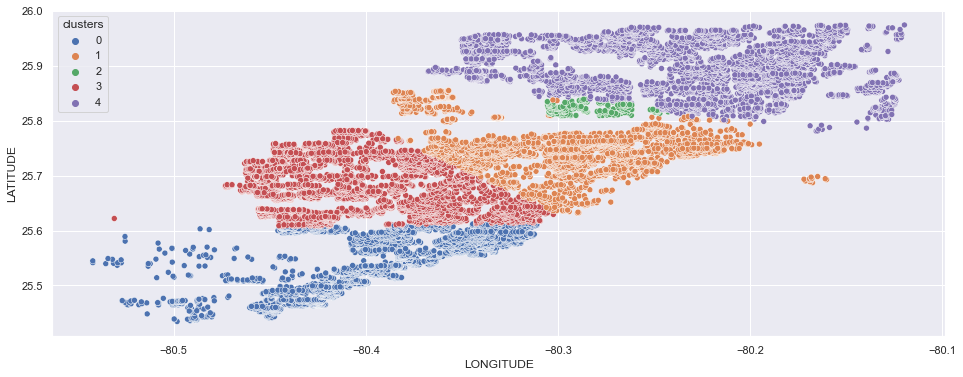

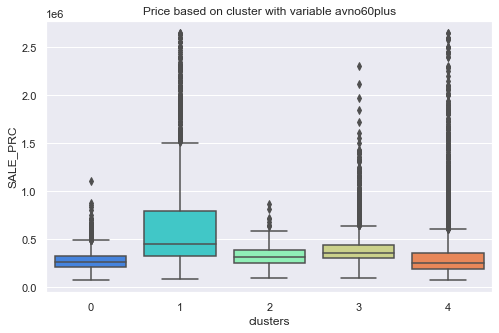

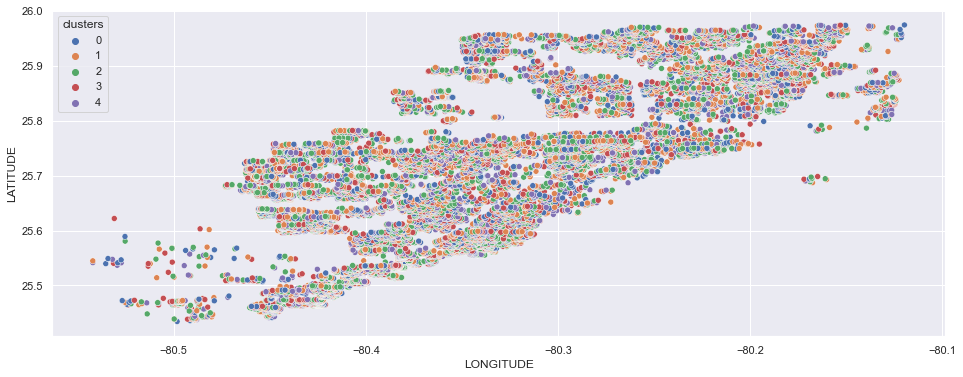

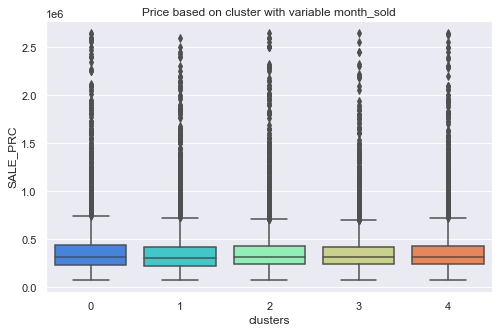

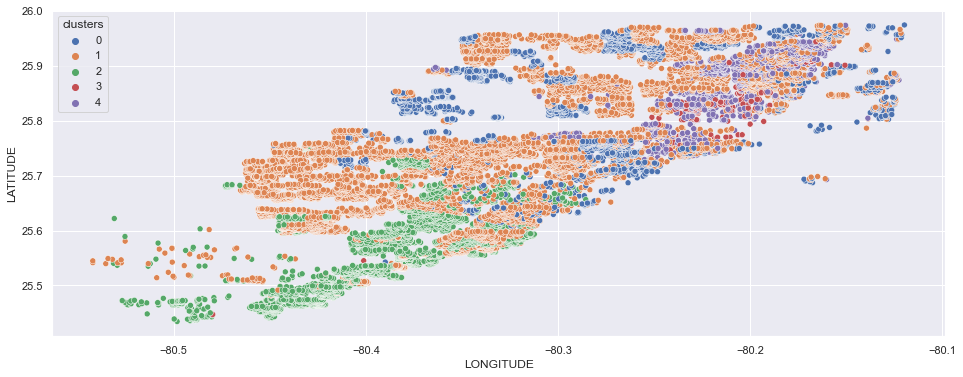

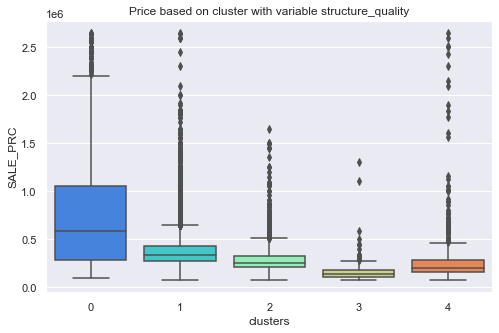

In [12]:
list = ["LND_SQFOOT","TOT_LVG_AREA","SPEC_FEAT_VAL","RAIL_DIST","OCEAN_DIST","WATER_DIST","CNTR_DIST","SUBCNTR_DI","HWY_DIST","age","avno60plus","month_sold","structure_quality"]

for item in list:
    three_Feature_clustering(item)

<ipython-input-13-53f8aabfc159>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,5))


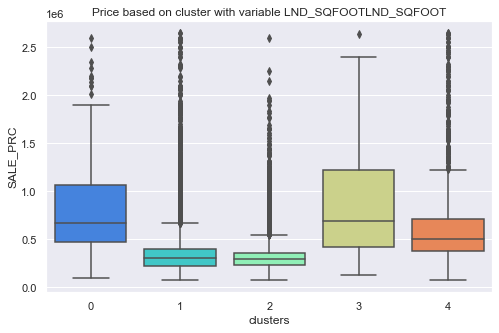

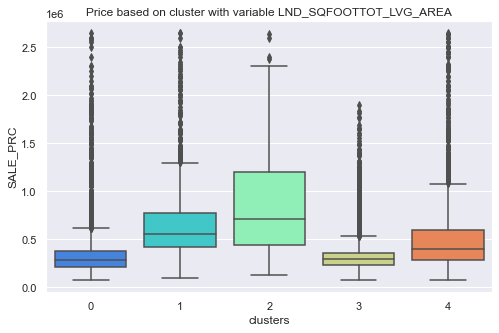

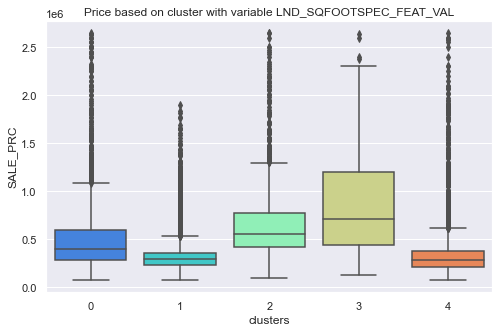

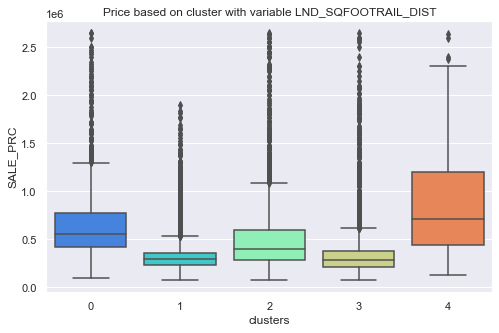

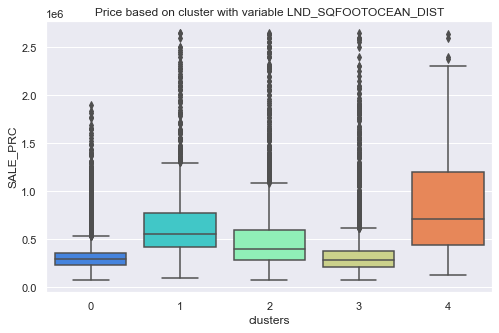

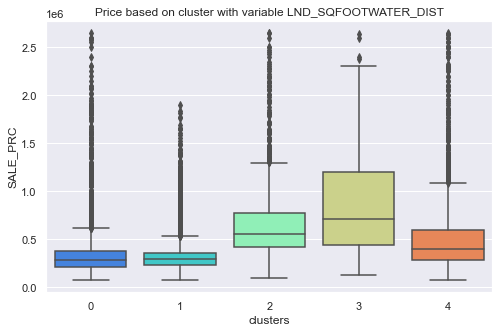

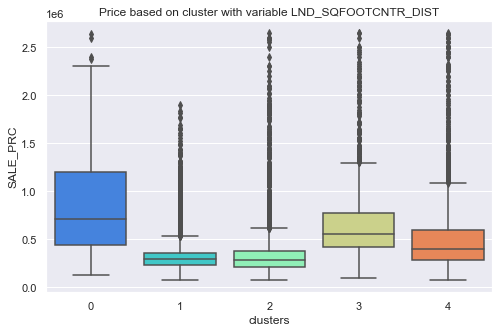

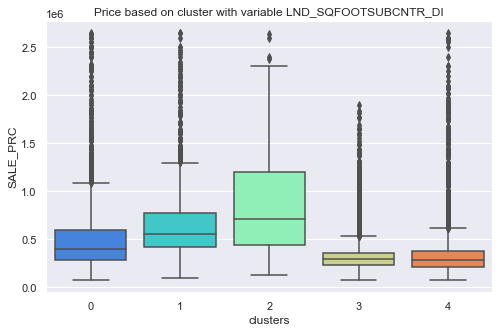

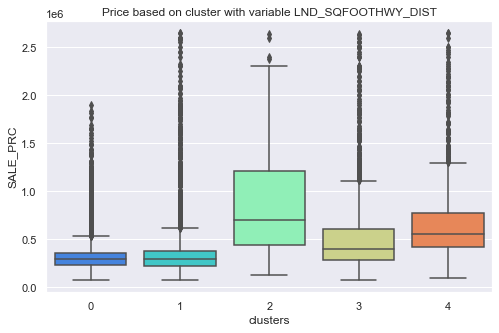

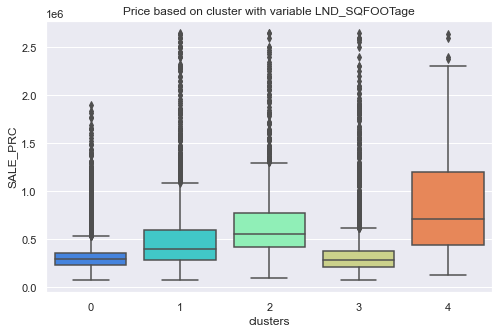

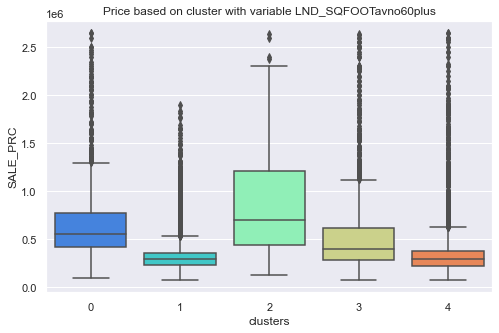

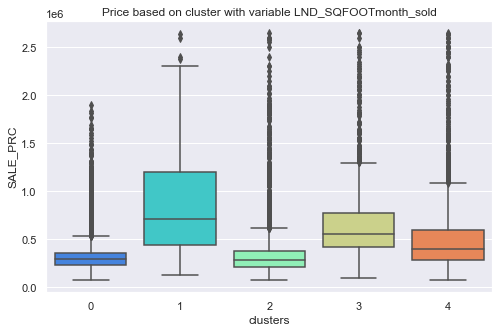

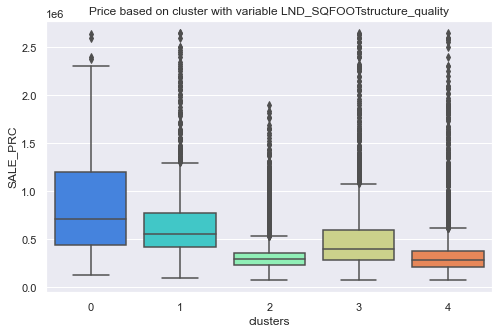

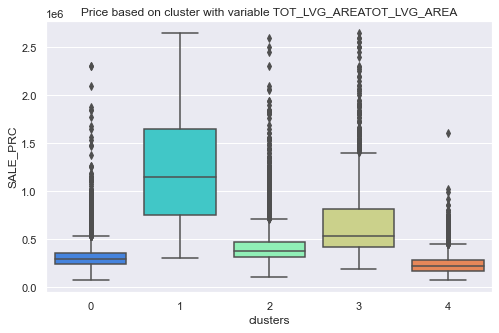

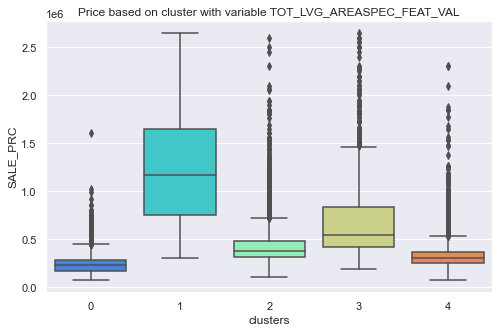

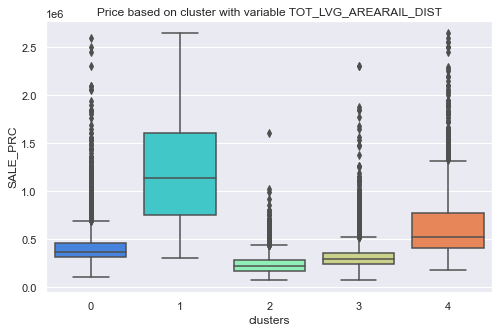

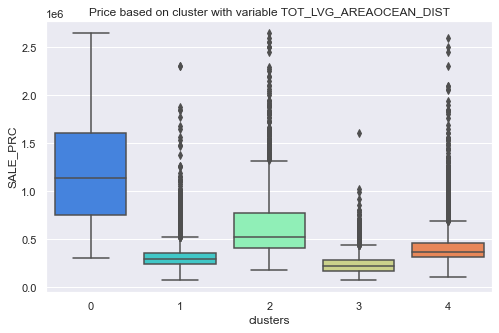

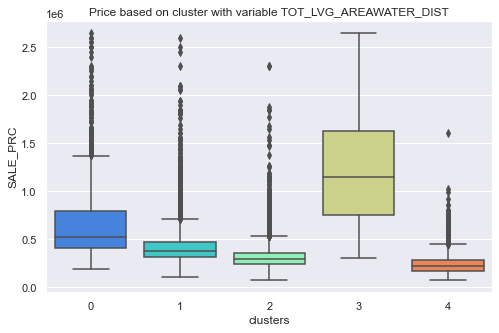

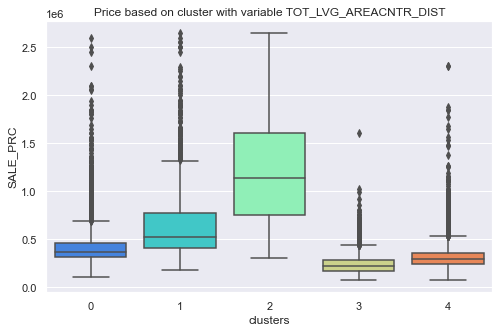

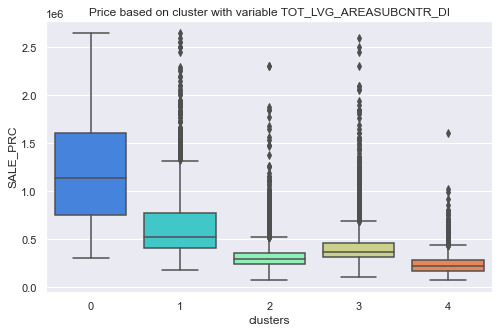

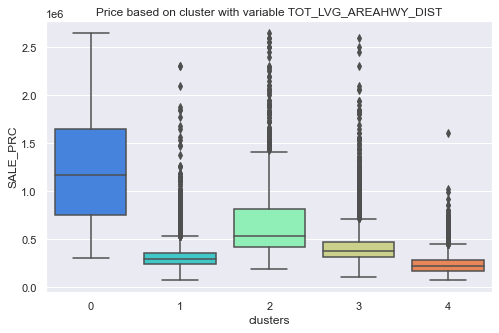

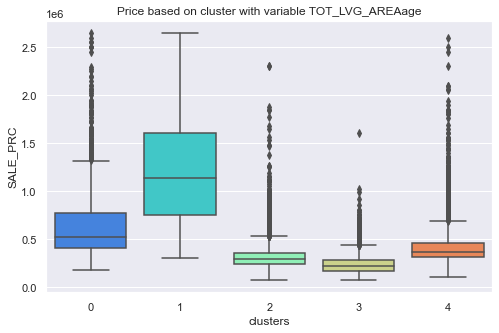

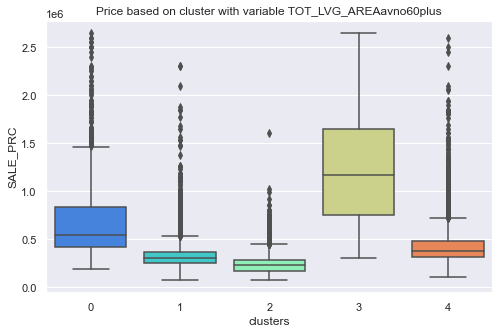

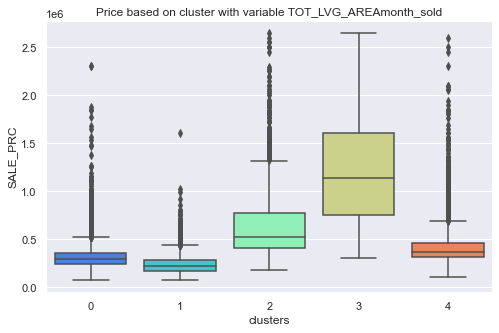

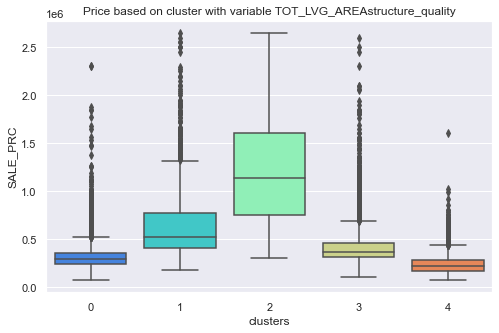

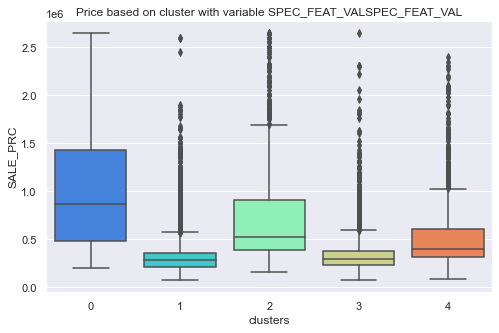

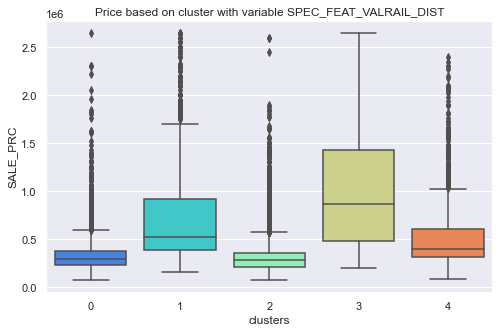

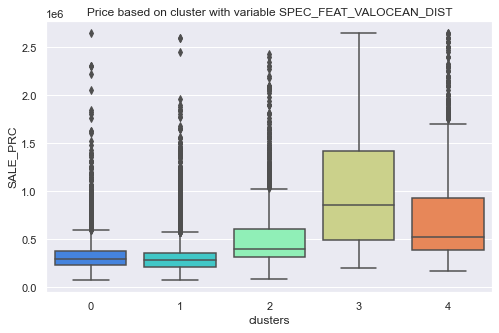

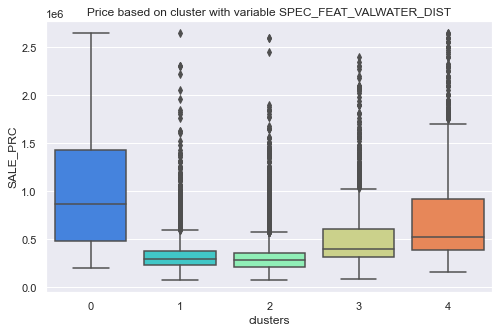

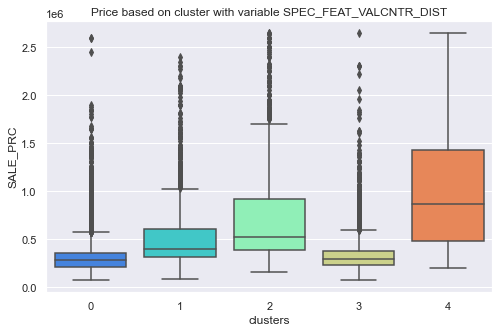

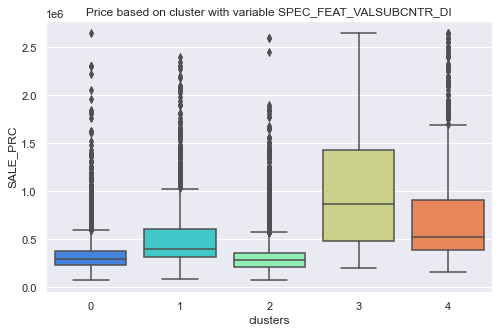

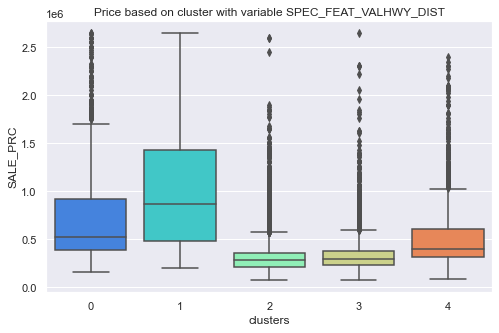

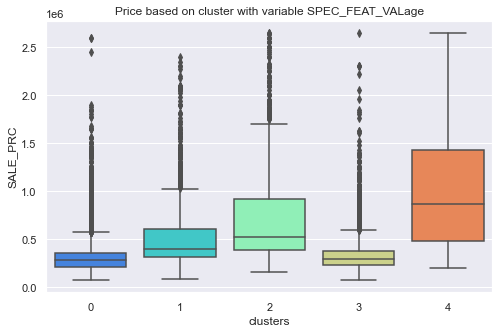

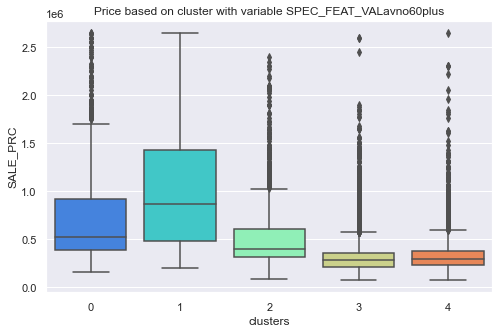

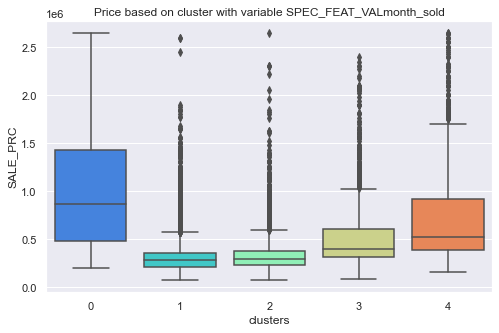

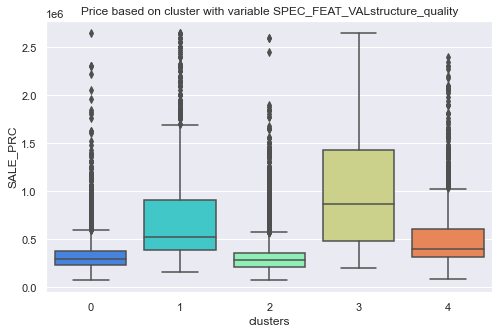

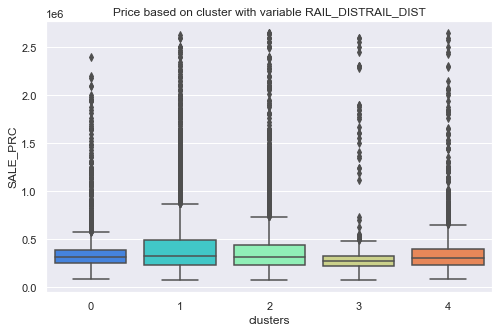

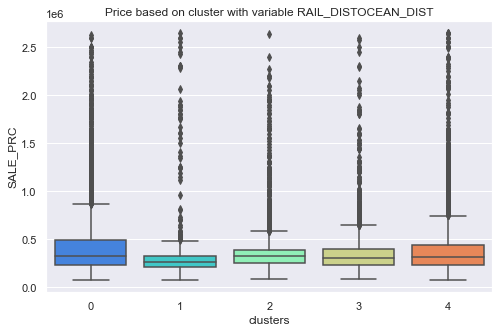

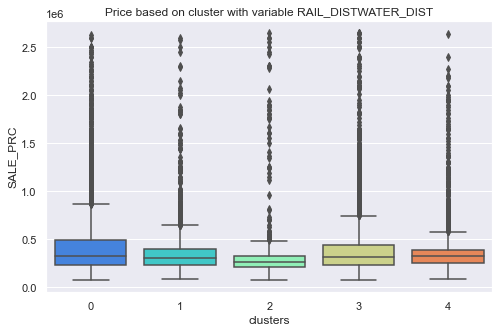

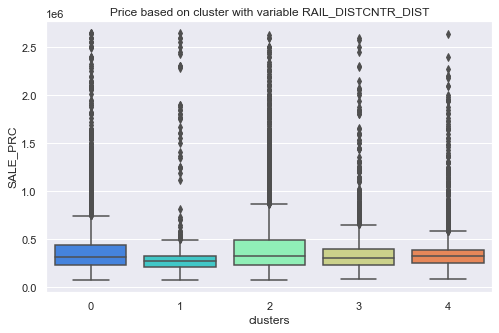

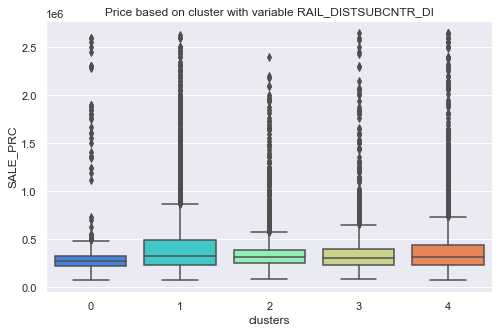

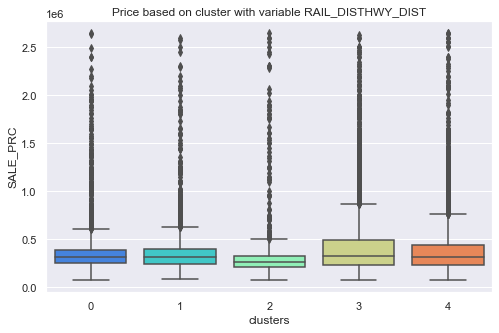

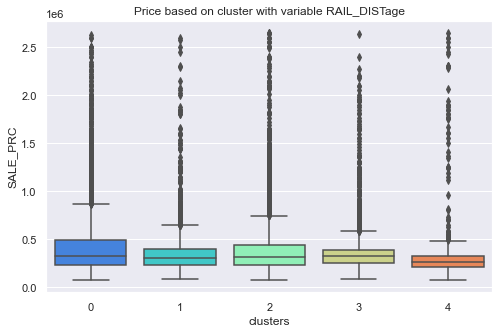

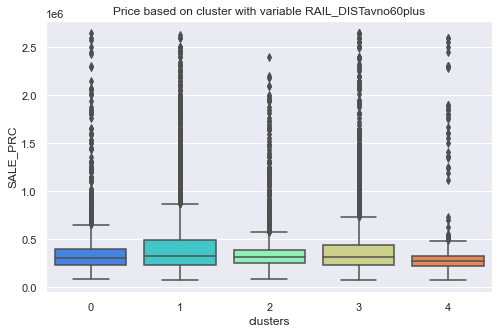

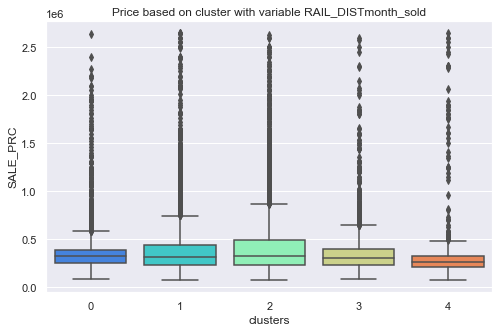

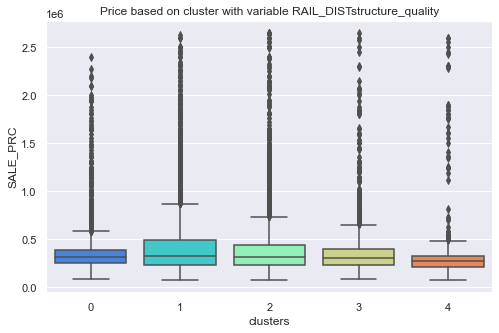

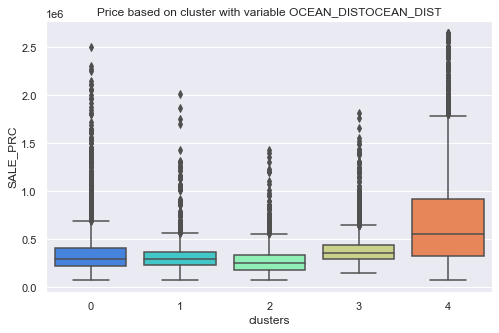

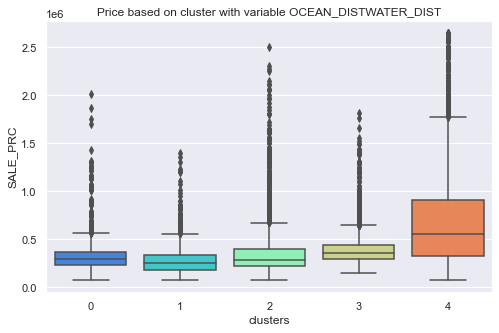

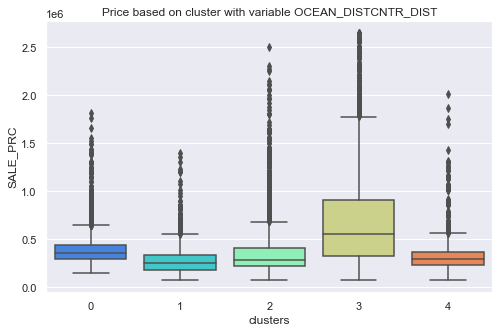

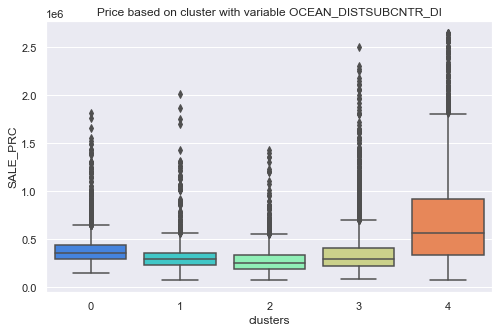

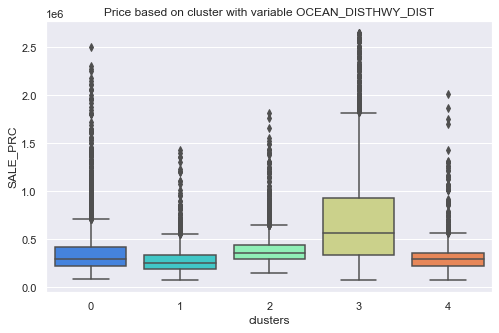

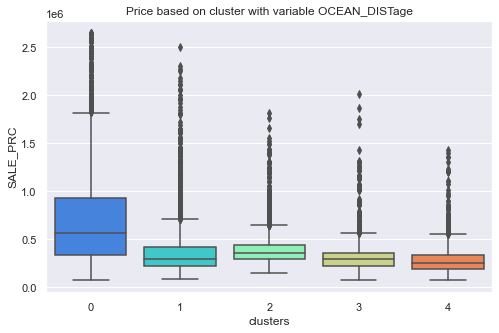

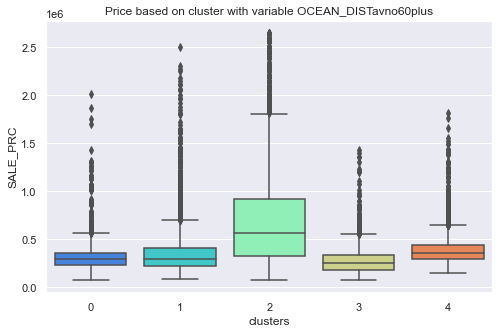

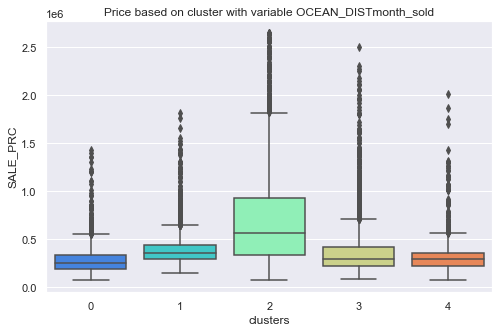

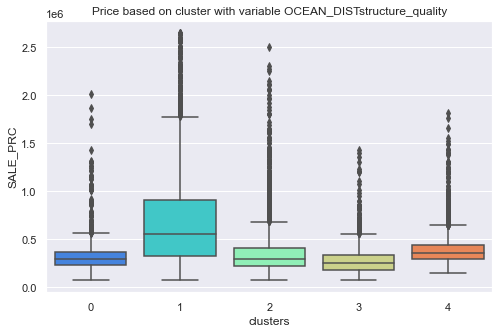

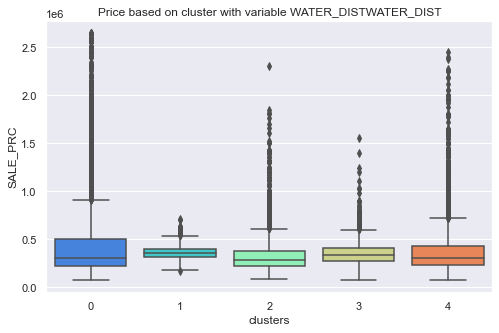

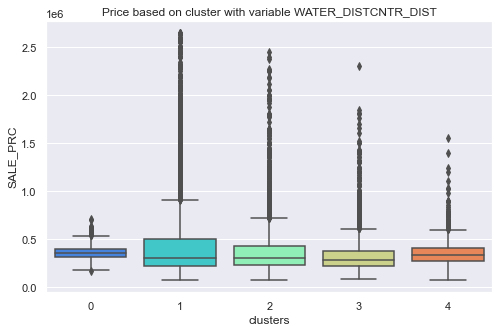

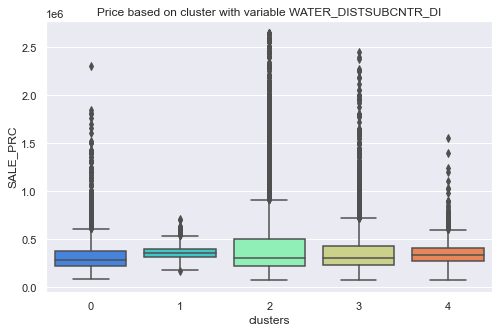

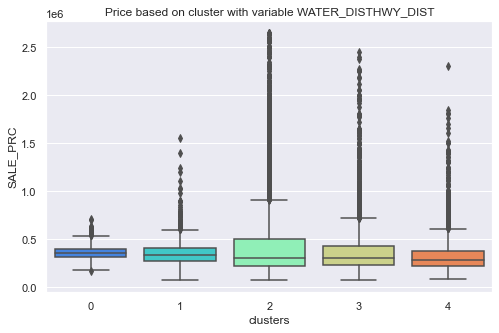

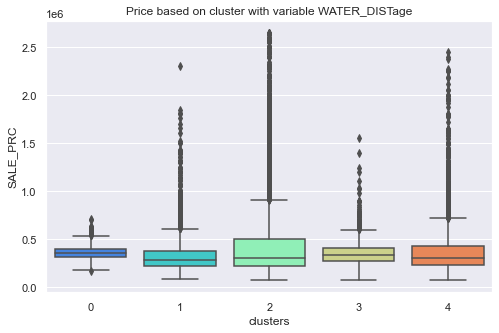

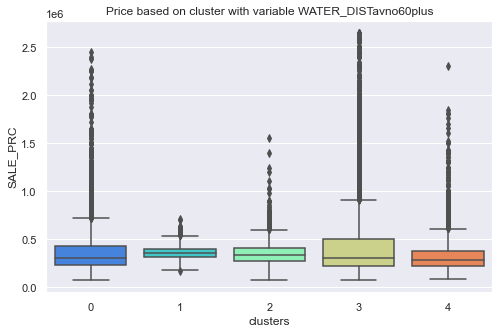

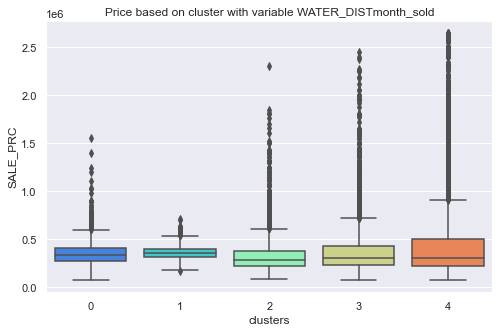

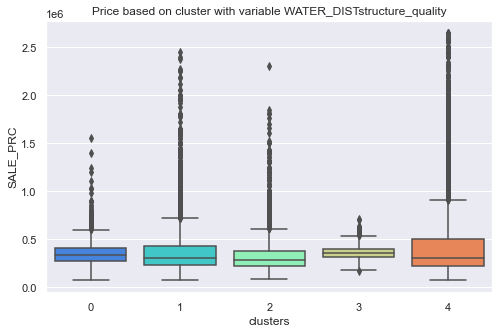

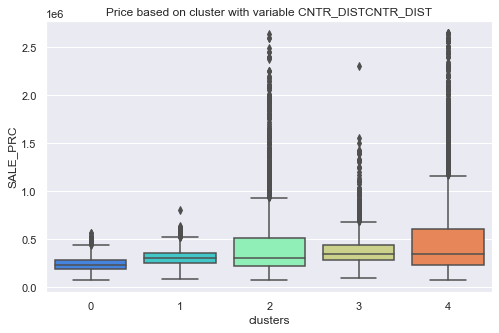

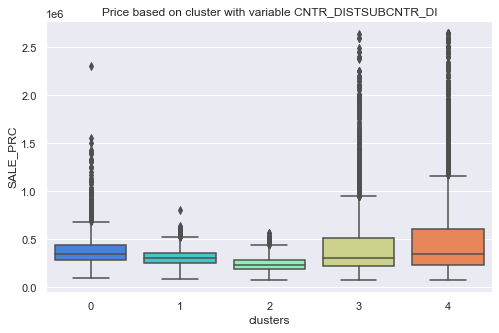

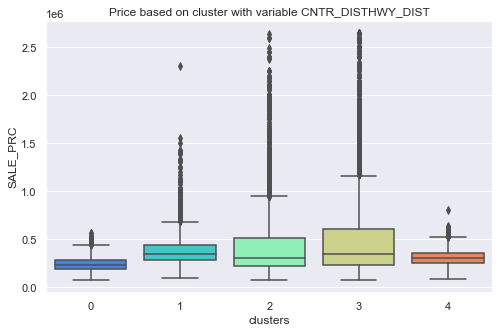

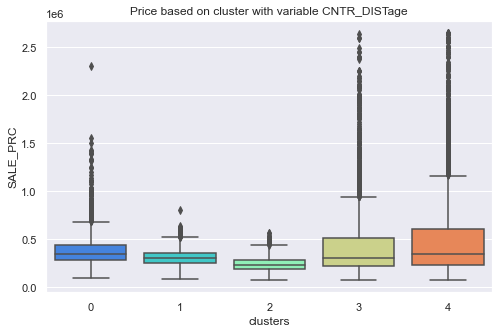

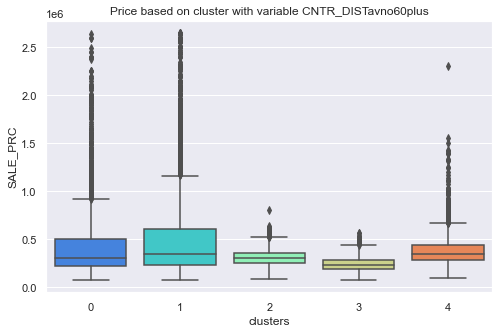

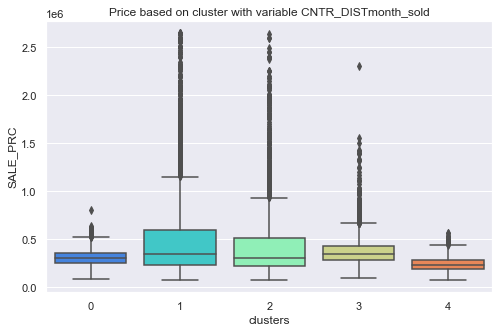

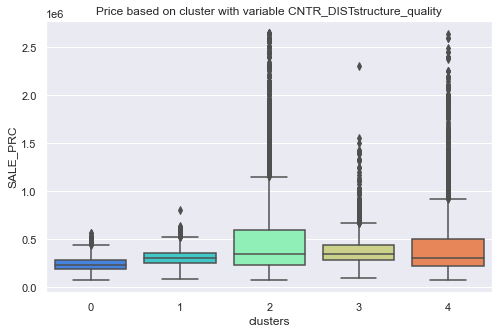

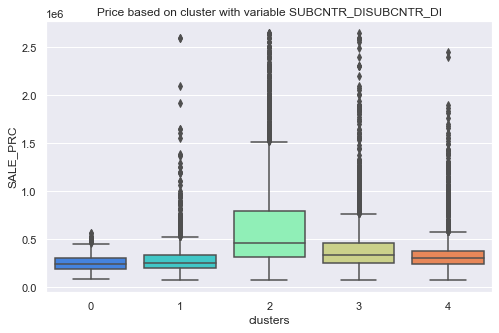

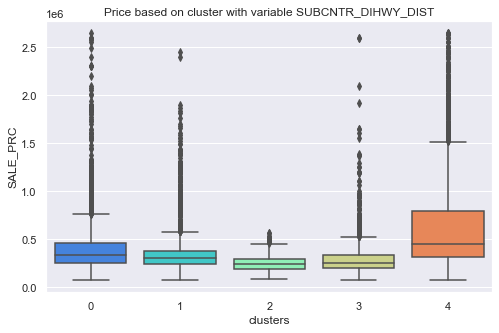

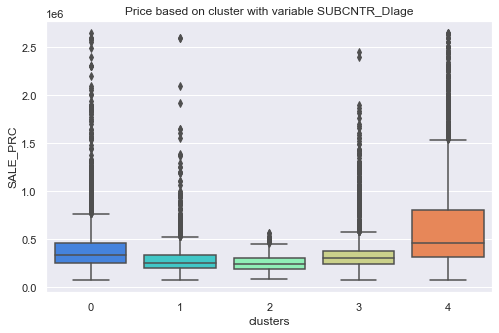

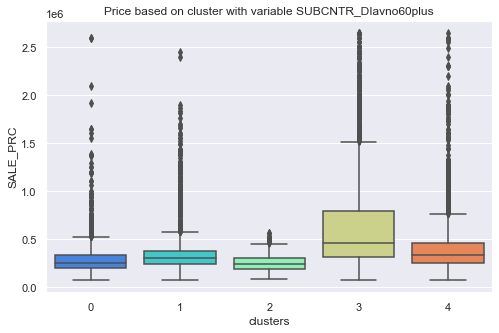

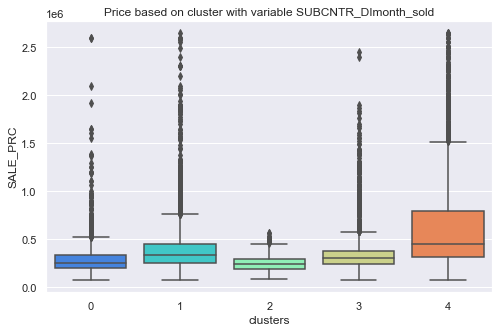

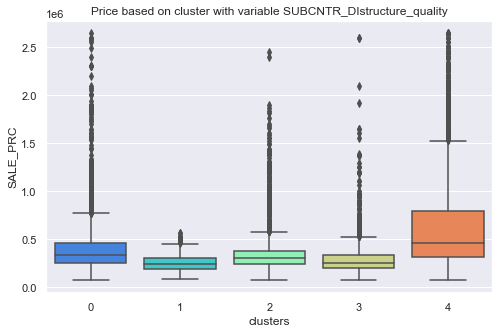

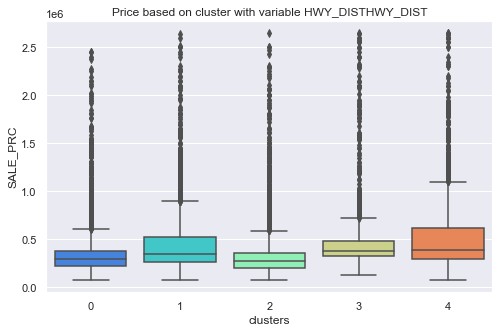

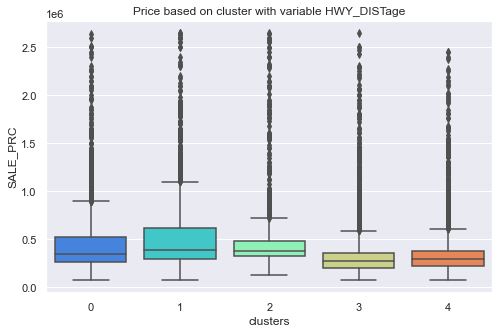

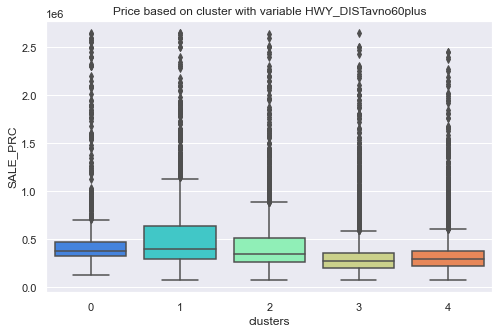

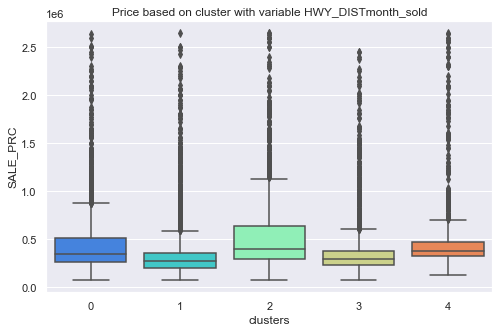

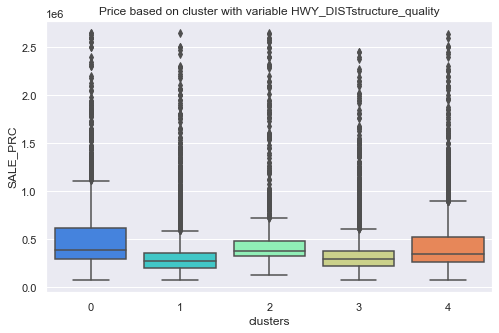

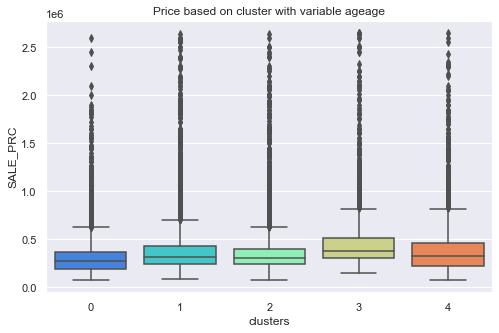

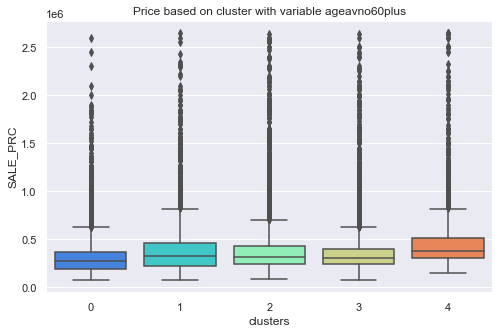

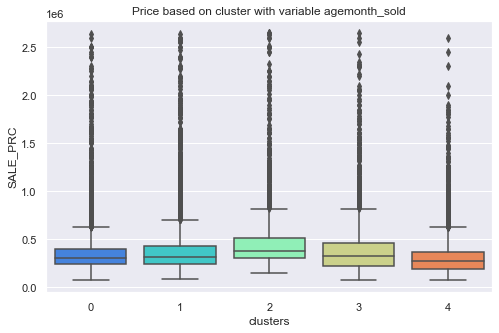

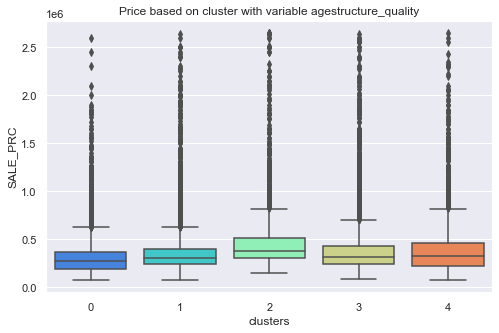

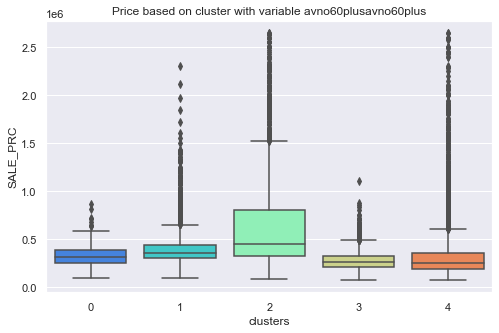

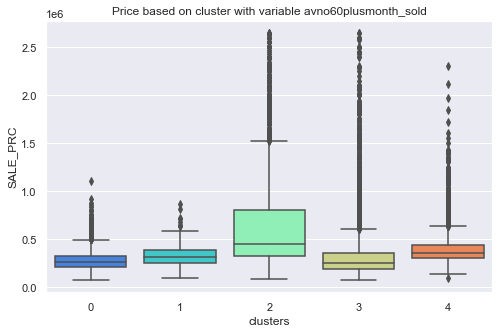

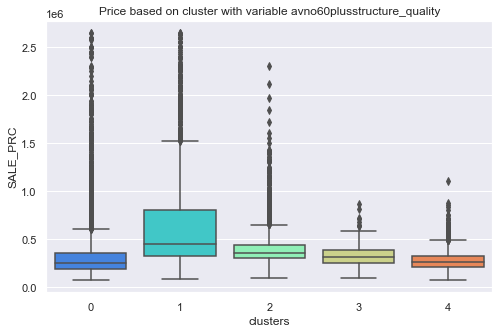

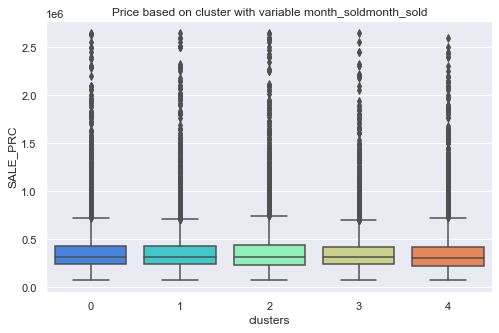

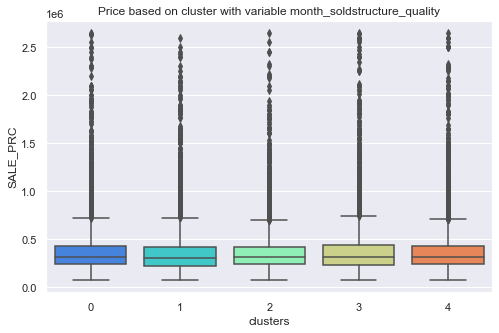

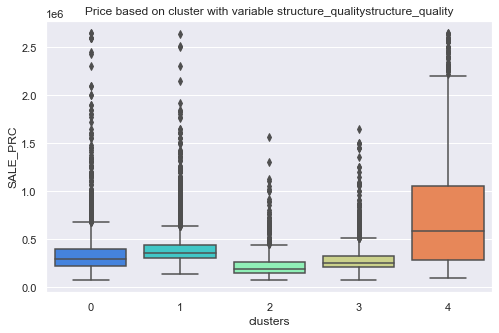

In [13]:
def four_Feature_clustering(varname, varname1):
    dataset = pd.read_csv("miami_housing.csv") #import data 
    X = dataset[['LATITUDE', 'LONGITUDE', 'PARCELNO', varname]]
    k_means = KMeans(n_clusters=5, init='random')
    X['clusters'] = k_means.fit_predict(X[['LATITUDE', 'LONGITUDE', varname]])
    X = X[['PARCELNO', 'clusters']]
    dataset = dataset.merge(X, left_on="PARCELNO", right_on="PARCELNO")
    plt.figure(figsize=(8,5))
    sb.boxplot(x='clusters',y='SALE_PRC',data=dataset, palette='rainbow')
    string = "Price based on cluster with variable " +str(varname) +str(varname1)
    plt.title(string)
    
list = ["LND_SQFOOT","TOT_LVG_AREA","SPEC_FEAT_VAL","RAIL_DIST","OCEAN_DIST","WATER_DIST","CNTR_DIST","SUBCNTR_DI","HWY_DIST","age","avno60plus","month_sold","structure_quality"]

for x in range(len(list)):
    for y in range(x, len(list)):
        four_Feature_clustering(list[x], list[y])